
Define the Gridworld

In [180]:
import numpy as np
'''define the environment class'''
class Gridworld(object):
    def __init__(self, grid_height,grid_width, start_state, goal_state):
        self.height = grid_height
        self.width = grid_width
        self.start_state = start_state # the start state is a tuple
        self.state = start_state # the current state is a tuple
        self.goal_state = goal_state # the goal state is a list of tuples
        
    def step(self,action):
        # action 0,1,2,3: e,w,n,s
        if action==0 and self.state[1]+1 < self.width:
            self.state = (self.state[0],self.state[1]+1)
        if action==1 and self.state[1]-1 >= 0:
            self.state = (self.state[0],self.state[1]-1)
        if action==2 and self.state[0]-1 >= 0:
            self.state = (self.state[0]-1,self.state[1])
        if action==3 and self.state[0]+1 < self.height:
            self.state = (self.state[0]+1,self.state[1])
        done = False
        if self.state in self.goal_state:
            done = True
        reward = -1.0
        return reward,done
    
    def get_reward(self,state,action):
        if state in self.goal_state:
            return 0.0
        else:
            return -1.0
    def get_next_state(self,state,action):
        if action==0 and state[1]+1 < self.width:
            return (state[0],state[1]+1)
        if action==1 and state[1]-1 >= 0:
            return (state[0],state[1]-1)
        if action==2 and state[0]-1 >= 0:
            return (state[0]-1,state[1])
        if action==3 and state[0]+1 < self.height:
            return (state[0]+1,state[1])
        return state
    
    def reset(self):
        self.state = self.start_state
        
    

Define the agent and its policy / value function

In [181]:
height = 6
width = 6
gamma = 0.9
theta = 1e-10
num_actions = 4 #action_space = [0,1,2,3] stands for e,w,n,s
env = Gridworld(height,width,(0,0),[(0,1),(5,5)])


Number of Policy Iteration:  5
Number of Policy Evaluation:  180
Number of Policy Improvement:  180


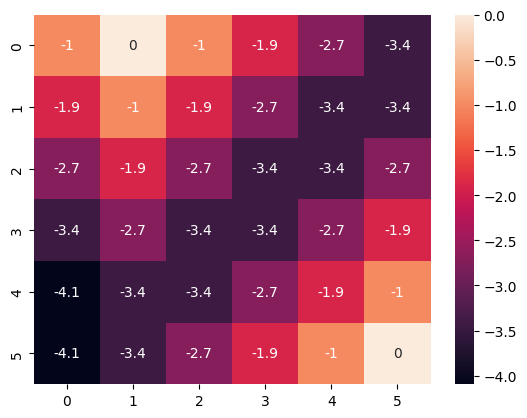

In [182]:
def Policy_Iteration():
    
    value_function = np.zeros((height,width))*0.0
    policy = np.ones((height,width,num_actions))*0.25
    num_policy_itration = 0
    num_policy_evaluation = 0
    num_policy_improvement = 0
    while True:
        num_policy_itration += 1
        #Policy Evaluation
        env = Gridworld(height,width,(0,0),[(0,1),(5,5)])
        delta = theta
        #Policy Evaluation
        while delta >= theta :
            #loop for each s in S
            
            new_value_function = np.zeros((height,width))*0.0
            for i in range(height):
                for j in range(width):
                    num_policy_evaluation += 1
                    for k in range(num_actions):
                        new_value_function[i,j] += policy[i,j,k]*(env.get_reward((i,j),k)+gamma*value_function[env.get_next_state((i,j),k)])
            value_function = new_value_function
            delta = np.max(np.abs(new_value_function-value_function))
        #Policy Improvement
        policy_stable = True
        for i in range(height):
                for j in range(width):
                    num_policy_improvement += 1
                    old_action = np.argmax(policy[i,j])
                    new_action = np.argmax([np.sum(policy[i,j]*value_function[env.get_next_state((i,j),k)]) for k in range(num_actions)])
                    if old_action != new_action:
                        policy_stable = False
                    policy[i,j] = np.eye(num_actions)[new_action]
        if policy_stable:
            
            print("Number of Policy Iteration: ",num_policy_itration)
            print("Number of Policy Evaluation: ",num_policy_evaluation)
            print("Number of Policy Improvement: ",num_policy_improvement)
            policy = np.argmax(policy, axis=2)
            #print(value_function)
            #print(policy)
            return value_function,policy
        
value_function,policy = Policy_Iteration()
import seaborn as sns
ax = sns.heatmap(value_function,annot=True)

number of value iteration is:  36
[[-1.      0.     -1.     -1.9    -2.71   -3.439 ]
 [-1.9    -1.     -1.9    -2.71   -3.439  -3.439 ]
 [-2.71   -1.9    -2.71   -3.439  -3.439  -2.71  ]
 [-3.439  -2.71   -3.439  -3.439  -2.71   -1.9   ]
 [-4.0951 -3.439  -3.439  -2.71   -1.9    -1.    ]
 [-4.0951 -3.439  -2.71   -1.9    -1.      0.    ]]
[[0. 2. 1. 1. 1. 1.]
 [0. 2. 1. 1. 1. 3.]
 [0. 2. 1. 1. 0. 3.]
 [0. 2. 1. 0. 0. 3.]
 [0. 2. 0. 0. 0. 3.]
 [0. 0. 0. 0. 0. 0.]]


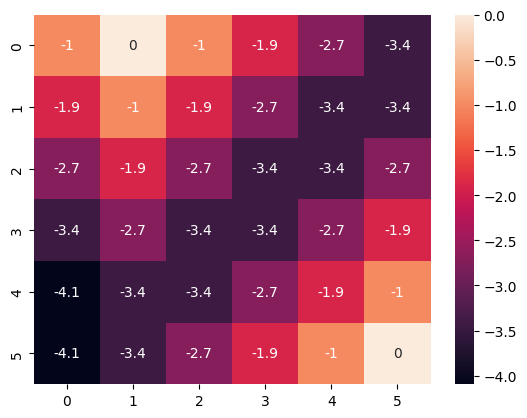

In [183]:
#Value Iteration
def Value_Iteration():
    value_function = np.zeros((height,width))*0.0
    policy = np.zeros((height,width))
    num_value_iteration = 0
    delta = theta
    while delta >= theta:
        num_value_iteration = 0
        new_value_function = np.zeros((height,width))*0.0
        for i in range(height):
            for j in range(width):
                num_value_iteration  += 1
                new_value_function[i,j] = np.max([(env.get_reward((i,j),k)+gamma*value_function[env.get_next_state((i,j),k)]) for k in range(num_actions)])
        delta = np.max(np.abs(new_value_function-value_function))
        value_function = new_value_function
        
#update policy according to the  converged value function
    for i in range(height):
        for j in range(width):
            policy[i,j] = np.argmax( [(env.get_reward((i,j),k)+gamma*value_function[env.get_next_state((i,j),k)]) for k in range(num_actions)])
    print('number of value iteration is: ',num_value_iteration)
    print(value_function)
    ax = sns.heatmap(value_function,annot=True)
    print(policy)
    
Value_Iteration()